### Import & Data Load

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
%matplotlib inline
plt.rc('font', family='Malgun Gothic')

seed = 0 # fixed seed

In [2]:
df = pd.read_csv("C:/Users/dongjae/[3-2_Class_Data_mining]/heart_2020_cleaned.csv", encoding='cp949')
display(df)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


### 데이터 탐색

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

None

In [4]:
# numeric(4)
numeric_col = ['BMI','PhysicalHealth','MentalHealth','SleepTime']
for i in numeric_col:
    print('{}의 범위는 {} - {} 이다.'.format(i, min(df[i]), max(df[i]),))
    
# categorical(14)
categorical_col = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking', 'Sex',
                   'AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth',
                   'Asthma','KidneyDisease','SkinCancer']
for i in categorical_col:
    print('{}: {}'.format(i, df[i].unique()))

BMI의 범위는 12.02 - 94.85 이다.
PhysicalHealth의 범위는 0.0 - 30.0 이다.
MentalHealth의 범위는 0.0 - 30.0 이다.
SleepTime의 범위는 1.0 - 24.0 이다.
HeartDisease: ['No' 'Yes']
Smoking: ['Yes' 'No']
AlcoholDrinking: ['No' 'Yes']
Stroke: ['No' 'Yes']
DiffWalking: ['No' 'Yes']
Sex: ['Female' 'Male']
AgeCategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity: ['Yes' 'No']
GenHealth: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma: ['Yes' 'No']
KidneyDisease: ['No' 'Yes']
SkinCancer: ['Yes' 'No']


#### 종속변수와 독립변수 확인

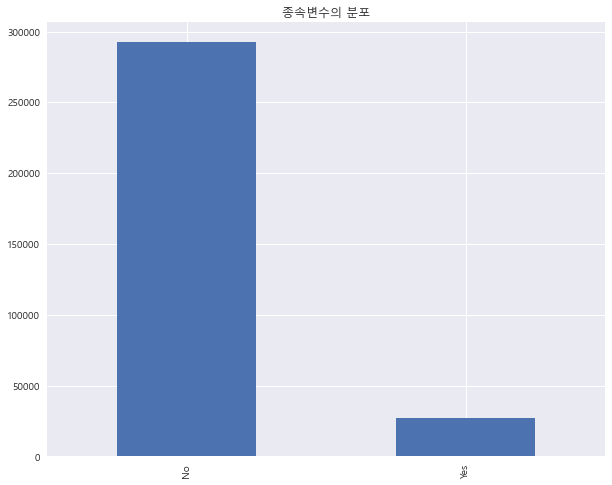

종속변수의 분포는 No: 91.44%, Yes: 8.56% 으로 불균형


In [5]:
plt.figure(figsize=(10,8))
df['HeartDisease'].value_counts().plot(kind='bar')
plt.title('종속변수의 분포')
# plt.savefig('종속변수의 분포.png')
plt.show()
rate_yes = df['HeartDisease'].value_counts()['Yes']/df['HeartDisease'].value_counts().sum()
rate_no = 1 - rate_yes
print('종속변수의 분포는 No: {:.2%}, Yes: {:.2%} 으로 불균형'.format(rate_no,rate_yes))
# imbalanced data의 경우 oversampling통해 해결할 예정

범주형 변수들


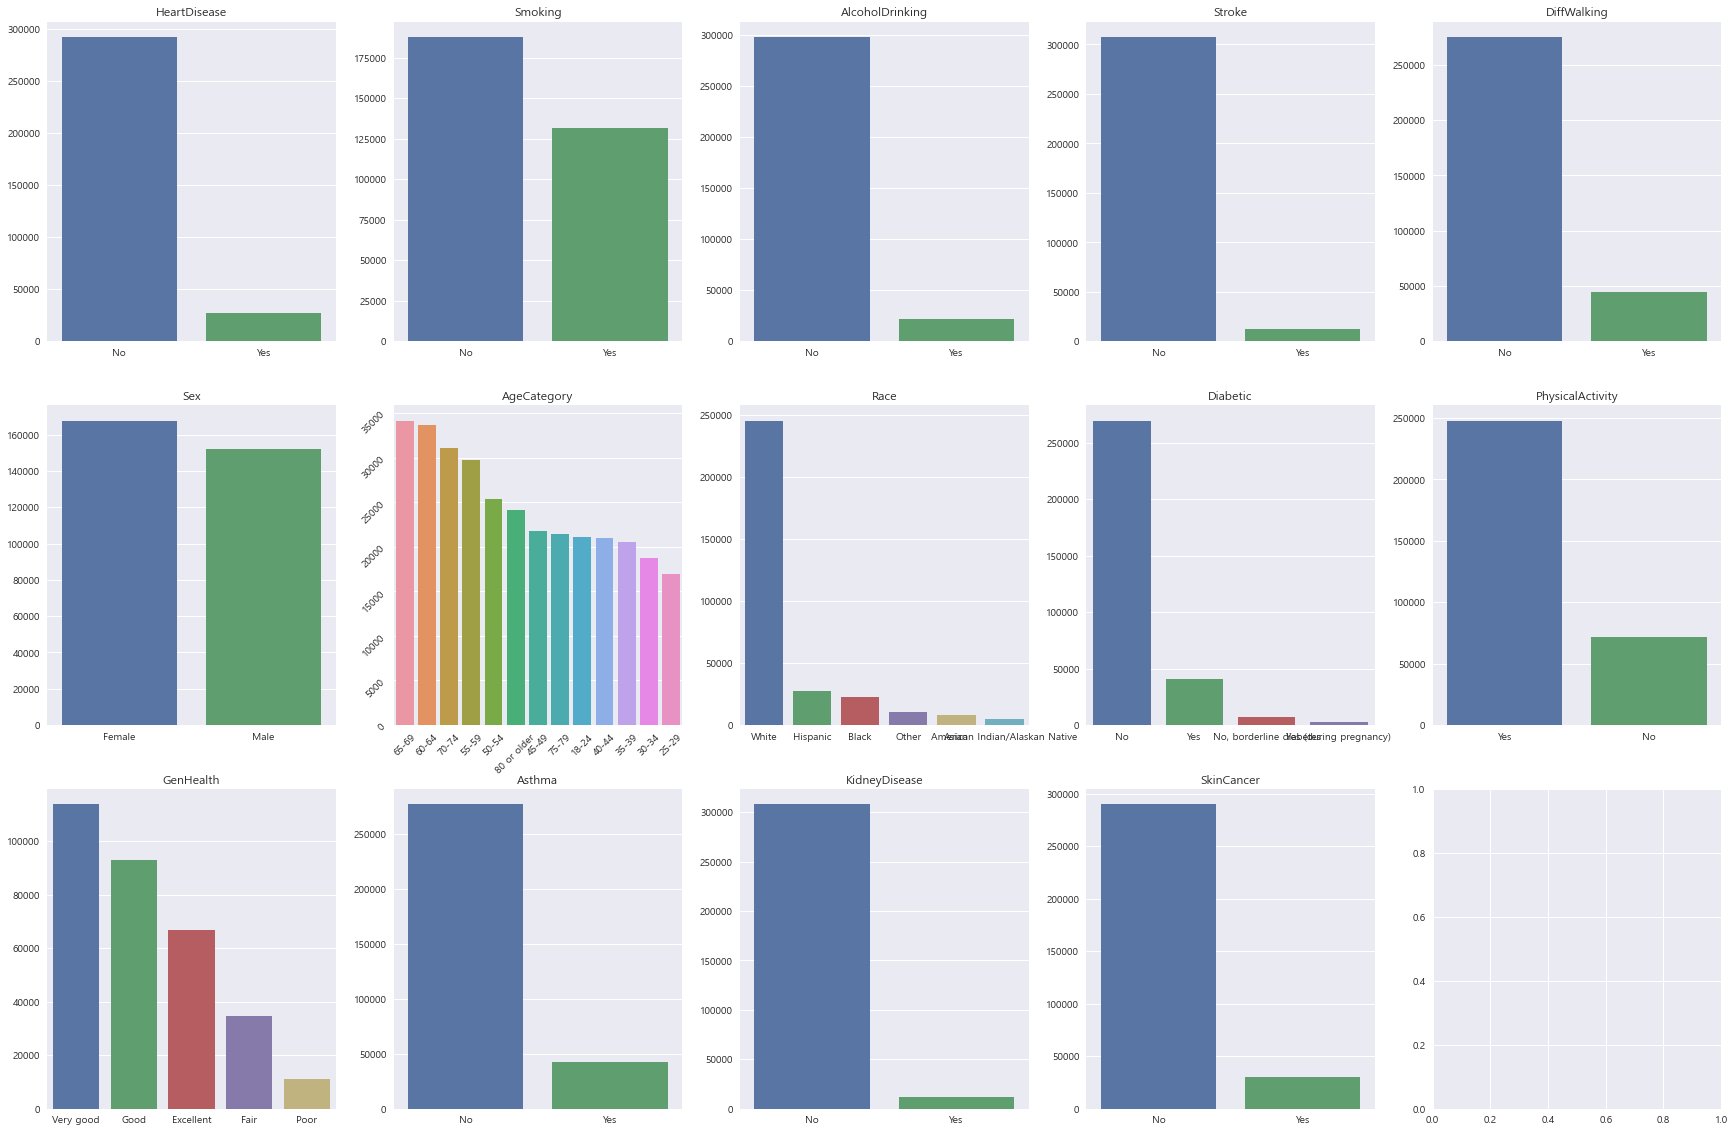

수치형 변수들


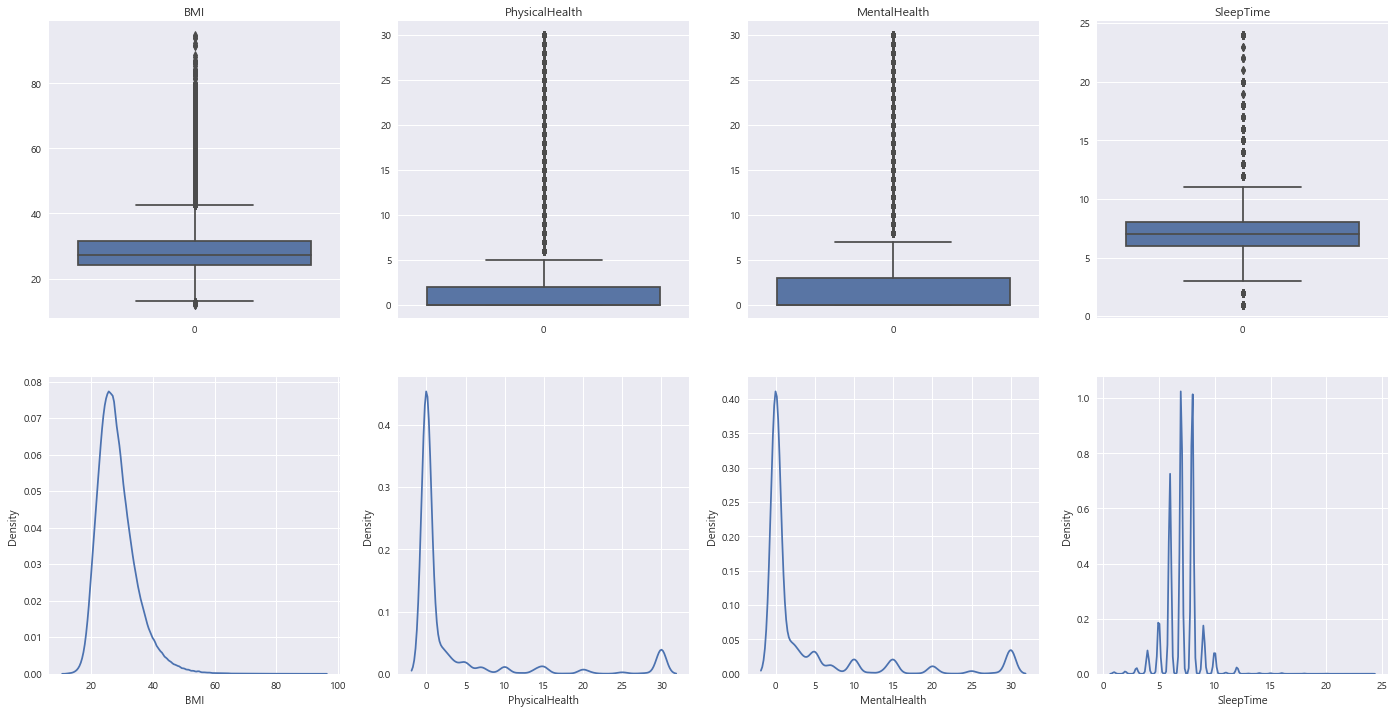

In [6]:
# 범주형 변수들
print('범주형 변수들')
f, ax = plt.subplots(3,5,figsize=(30,20))
for n, i  in enumerate(categorical_col):
    sns.barplot(x=df.loc[:,i].value_counts().index,y=df.loc[:,i].value_counts().values, ax= ax[n//5,n%5])
    ax[n//5,n%5].set_title(i)
    if i =='AgeCategory':
        ax[n//5,n%5].tick_params(labelrotation=45)
# plt.savefig('범주형 변수들.png')
plt.show()
# 수치형 변수들
print('수치형 변수들')
f, ax = plt.subplots(2,4, figsize=(24,12))
for n, i in enumerate(numeric_col):
    ax[0,n%4].set_title(i)
    sns.boxplot(data = df.loc[:,i], ax = ax[0,n%4])
for n, i in enumerate(numeric_col):
    sns.kdeplot(df.loc[:,i], ax = ax[1,n%4])
# plt.savefig('수치형 변수들.png')
plt.show()

#### GenHealth columns 관계

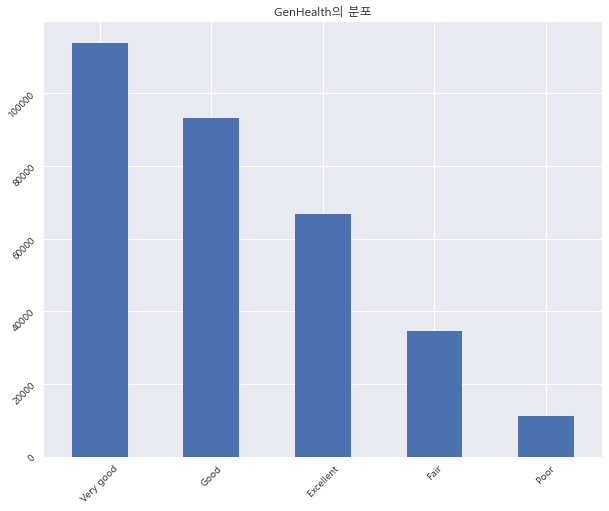

In [7]:
# GenHealth 
plt.figure(figsize=(10,8))
df['GenHealth'].value_counts().plot(kind='bar').tick_params(labelrotation=45)
plt.title('GenHealth의 분포')
# plt.savefig('GenHealth의 분포.png')
plt.show()

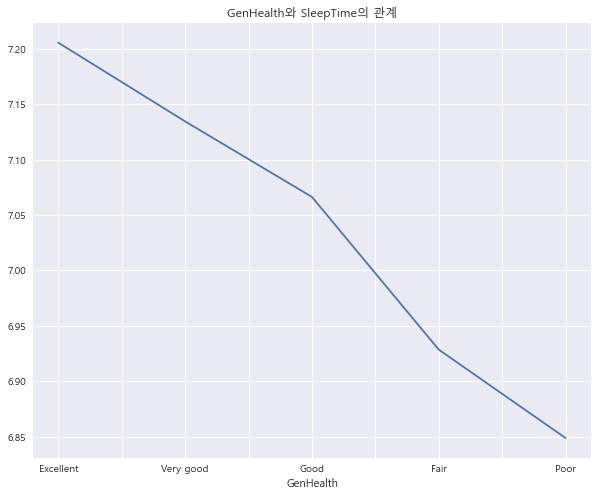

In [8]:
# GenHealth와 SleepTime의 관계
plt.figure(figsize=(10,8))
df.groupby(['GenHealth'])['SleepTime'].mean().sort_values(ascending=False).plot()
plt.title('GenHealth와 SleepTime의 관계')
# plt.savefig('GenHealth와 SleepTime의 관계.png')
plt.show()
# 자신이 생각하는 몸상태와 평균수면시간과 반비례하는 경향을 띄었다.

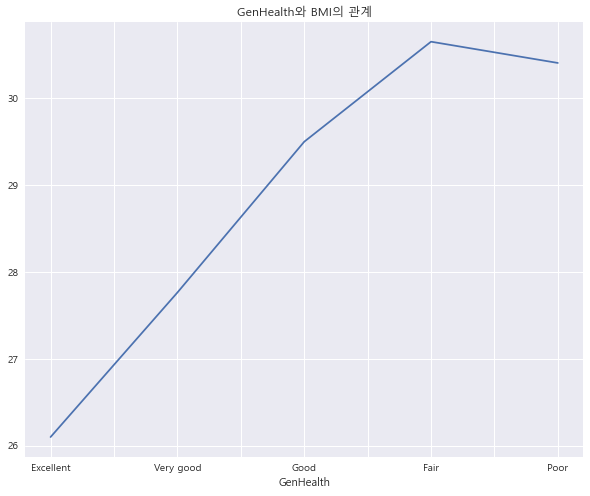

In [9]:
# GenHealth과 BMI의 관계
plt.figure(figsize=(10,8))
df.groupby(['GenHealth'])['BMI'].mean().reindex(['Excellent','Very good','Good','Fair','Poor']).plot()
plt.title('GenHealth와 BMI의 관계')
# plt.savefig('GenHealth와 BMI의 관계.png')
plt.show()
# 자신이 생각하는 몸상태와 MBI와 비례하는 경향을 띄었다.

### 모델링

#### 전처리 - 범주형 데이터 라벨 인코딩

In [10]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

df[categorical_col] = oe.fit_transform(df[categorical_col])

In [11]:
# numeric: 독립변수(4)
numeric_col = ['BMI','PhysicalHealth','MentalHealth','SleepTime']
for i in numeric_col:
    print('{}의 범위는 {} - {} 이다.'.format(i, min(df[i]), max(df[i]),))
    
# categorical: 독립변수(13), 종속변수(1)
categorical_col = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking',
       'Sex','AgeCategory','Race','Diabetic','PhysicalActivity',
       'GenHealth','Asthma','KidneyDisease','SkinCancer']
for i in categorical_col:
    print('{}: {}'.format(i, df[i].unique()))

BMI의 범위는 12.02 - 94.85 이다.
PhysicalHealth의 범위는 0.0 - 30.0 이다.
MentalHealth의 범위는 0.0 - 30.0 이다.
SleepTime의 범위는 1.0 - 24.0 이다.
HeartDisease: [0. 1.]
Smoking: [1. 0.]
AlcoholDrinking: [0. 1.]
Stroke: [0. 1.]
DiffWalking: [0. 1.]
Sex: [0. 1.]
AgeCategory: [ 7. 12.  9. 11.  4. 10.  8.  6.  5.  0.  3.  2.  1.]
Race: [5. 2. 1. 0. 4. 3.]
Diabetic: [2. 0. 1. 3.]
PhysicalActivity: [1. 0.]
GenHealth: [4. 1. 2. 3. 0.]
Asthma: [1. 0.]
KidneyDisease: [0. 1.]
SkinCancer: [1. 0.]


#### 준비 - 스케일링, 데이터셋 나누기

In [12]:
# 데이터 비율 6:2:2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

train = df.iloc[:256000,:] # 학습/테스트 = 8:2
test = df.iloc[256000:,:]
test_y = df.iloc[256000:,0]
test.drop('HeartDisease', axis=1, inplace=True)
y = train.pop('HeartDisease')

rc = RobustScaler()
train = rc.fit_transform(train)
train_x, valid_x, train_y, valid_y = train_test_split(train, y, test_size=0.25) # 학습/검증 = 3:1
test = rc.transform(test)

C:\Users\dongjae\AppData\Local\Temp\ipykernel_20028\818629280.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('HeartDisease', axis=1, inplace=True)


In [13]:
print(train_x.shape, valid_x.shape, test.shape)

(192000, 17) (64000, 17) (63795, 17)


#### 준비 - 오버샘플링

In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=seed)
resampled_x, resampled_y = sm.fit_resample(train_x, train_y)

In [15]:
train_x.shape

(192000, 17)

In [16]:
resampled_x.shape

(350934, 17)

In [65]:
# 다운샘플링의 결과 정확도, 재현율  각 70%

#### 하이퍼 파라미터 튜닝
- 해당 코드 출처: github.com/optuna

In [22]:
# # (10m)
# import optuna.integration.lightgbm as lgb
# from sklearn.metrics import accuracy_score

# params = {
#     'objective':'binary',
#     'metric':'binary_logloss',
#     'n_estimators': 200,
#     'subsample_freq':1,
#     'random_state': seed,
#     'n_jobs': -1,
# }
# dtrain = lgb.Dataset(resampled_x, label = resampled_y)
# dval = lgb.Dataset(valid_x, label = valid_y)
# model = lgb.train(params, dtrain, valid_sets=[dtrain, dval],
#                  verbose_eval=100, early_stopping_rounds=100)
# prediction = np.rint(model.predict(valid_x, num_iteration=model.best_iteration))
# accuracy = accuracy_score(valid_y, prediction)
# params = model.params
# print('Best params:', params)
# print('Accuracy =', accuracy)
# print('Params:')
# for key, value in params.items():
#     print('   {}:  {}'.format(key, value))

[I 2022-11-12 15:23:12,387] A new study created in memory with name: no-name-347b0167-9208-469e-bbe9-9ad172590e1d

feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.179456	valid_1's binary_logloss: 0.249898



feature_fraction, val_score: 0.244539:  14%|######4                                      | 1/7 [00:03<00:18,  3.16s/it][I 2022-11-12 15:23:15,561] Trial 0 finished with value: 0.2445386291038646 and parameters: {'feature_fraction': 0.7}. Best is trial 0 with value: 0.2445386291038646.

feature_fraction, val_score: 0.244539:  14%|######4                                      | 1/7 [00:03<00:18,  3.16s/it]

[200]	valid_0's binary_logloss: 0.165013	valid_1's binary_logloss: 0.244539
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.165013	valid_1's binary_logloss: 0.244539
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.18031	valid_1's binary_logloss: 0.250526



feature_fraction, val_score: 0.244232:  29%|############8                                | 2/7 [00:06<00:16,  3.34s/it][I 2022-11-12 15:23:19,020] Trial 1 finished with value: 0.24423163336642237 and parameters: {'feature_fraction': 0.5}. Best is trial 1 with value: 0.24423163336642237.

feature_fraction, val_score: 0.244232:  29%|############8                                | 2/7 [00:06<00:16,  3.34s/it]

[200]	valid_0's binary_logloss: 0.165548	valid_1's binary_logloss: 0.244232
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.165548	valid_1's binary_logloss: 0.244232
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.180101	valid_1's binary_logloss: 0.250749



feature_fraction, val_score: 0.244232:  43%|###################2                         | 3/7 [00:09<00:13,  3.31s/it][I 2022-11-12 15:23:22,287] Trial 2 finished with value: 0.2449779720094361 and parameters: {'feature_fraction': 0.8999999999999999}. Best is trial 1 with value: 0.24423163336642237.

feature_fraction, val_score: 0.244232:  43%|###################2                         | 3/7 [00:09<00:13,  3.31s/it]

[200]	valid_0's binary_logloss: 0.165391	valid_1's binary_logloss: 0.244978
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.165391	valid_1's binary_logloss: 0.244978
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.180424	valid_1's binary_logloss: 0.250257



feature_fraction, val_score: 0.243658:  57%|#########################7                   | 4/7 [00:15<00:12,  4.14s/it][I 2022-11-12 15:23:27,714] Trial 3 finished with value: 0.24365767799633972 and parameters: {'feature_fraction': 0.4}. Best is trial 3 with value: 0.24365767799633972.

feature_fraction, val_score: 0.243658:  57%|#########################7                   | 4/7 [00:15<00:12,  4.14s/it]

[200]	valid_0's binary_logloss: 0.165478	valid_1's binary_logloss: 0.243658
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.165478	valid_1's binary_logloss: 0.243658
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.179583	valid_1's binary_logloss: 0.250364



feature_fraction, val_score: 0.243658:  71%|################################1            | 5/7 [00:19<00:08,  4.02s/it][I 2022-11-12 15:23:31,522] Trial 4 finished with value: 0.24478792777867991 and parameters: {'feature_fraction': 0.8}. Best is trial 3 with value: 0.24365767799633972.

feature_fraction, val_score: 0.243658:  71%|################################1            | 5/7 [00:19<00:08,  4.02s/it]

[200]	valid_0's binary_logloss: 0.165267	valid_1's binary_logloss: 0.244788
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.165267	valid_1's binary_logloss: 0.244788
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.180225	valid_1's binary_logloss: 0.250853



feature_fraction, val_score: 0.243658:  86%|######################################5      | 6/7 [00:22<00:03,  3.94s/it][I 2022-11-12 15:23:35,296] Trial 5 finished with value: 0.24504208526071186 and parameters: {'feature_fraction': 1.0}. Best is trial 3 with value: 0.24365767799633972.

feature_fraction, val_score: 0.243658:  86%|######################################5      | 6/7 [00:22<00:03,  3.94s/it]

[200]	valid_0's binary_logloss: 0.164884	valid_1's binary_logloss: 0.245042
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.164884	valid_1's binary_logloss: 0.245042
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.179835	valid_1's binary_logloss: 0.250162



feature_fraction, val_score: 0.243658: 100%|#############################################| 7/7 [00:27<00:00,  3.92s/it]


[200]	valid_0's binary_logloss: 0.16551	valid_1's binary_logloss: 0.244376
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.16551	valid_1's binary_logloss: 0.244376



num_leaves, val_score: 0.243658:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.447816	valid_1's binary_logloss: 0.473612



num_leaves, val_score: 0.243658:   5%|##5                                               | 1/20 [00:02<00:41,  2.21s/it][I 2022-11-12 15:23:42,059] Trial 7 finished with value: 0.4469013554100348 and parameters: {'num_leaves': 2}. Best is trial 7 with value: 0.4469013554100348.

num_leaves, val_score: 0.243658:   5%|##5                                               | 1/20 [00:02<00:41,  2.21s/it]

[200]	valid_0's binary_logloss: 0.420368	valid_1's binary_logloss: 0.446901
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.420368	valid_1's binary_logloss: 0.446901
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.165645	valid_1's binary_logloss: 0.244628



num_leaves, val_score: 0.242363:  10%|#####                                             | 2/20 [00:07<01:11,  3.95s/it][I 2022-11-12 15:23:47,233] Trial 8 finished with value: 0.24236283113463397 and parameters: {'num_leaves': 90}. Best is trial 8 with value: 0.24236283113463397.

num_leaves, val_score: 0.242363:  10%|#####                                             | 2/20 [00:07<01:11,  3.95s/it]

[200]	valid_0's binary_logloss: 0.152521	valid_1's binary_logloss: 0.242363
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.152521	valid_1's binary_logloss: 0.242363
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169149	valid_1's binary_logloss: 0.24534



num_leaves, val_score: 0.242177:  15%|#######5                                          | 3/20 [00:12<01:13,  4.32s/it][I 2022-11-12 15:23:51,989] Trial 9 finished with value: 0.24217719291433348 and parameters: {'num_leaves': 67}. Best is trial 9 with value: 0.24217719291433348.

num_leaves, val_score: 0.242177:  15%|#######5                                          | 3/20 [00:12<01:13,  4.32s/it]

[200]	valid_0's binary_logloss: 0.156163	valid_1's binary_logloss: 0.242177
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156163	valid_1's binary_logloss: 0.242177
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.165576	valid_1's binary_logloss: 0.244722



num_leaves, val_score: 0.242177:  20%|##########                                        | 4/20 [00:17<01:15,  4.70s/it][I 2022-11-12 15:23:57,278] Trial 10 finished with value: 0.24226629721878432 and parameters: {'num_leaves': 91}. Best is trial 9 with value: 0.24217719291433348.

num_leaves, val_score: 0.242177:  20%|##########                                        | 4/20 [00:17<01:15,  4.70s/it]

[200]	valid_0's binary_logloss: 0.152256	valid_1's binary_logloss: 0.242266
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.152256	valid_1's binary_logloss: 0.242266
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.165528	valid_1's binary_logloss: 0.244663



num_leaves, val_score: 0.242177:  25%|############5                                     | 5/20 [00:22<01:14,  4.96s/it][I 2022-11-12 15:24:02,690] Trial 11 finished with value: 0.242207482005304 and parameters: {'num_leaves': 92}. Best is trial 9 with value: 0.24217719291433348.

num_leaves, val_score: 0.242177:  25%|############5                                     | 5/20 [00:22<01:14,  4.96s/it]

[200]	valid_0's binary_logloss: 0.152188	valid_1's binary_logloss: 0.242207
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.152188	valid_1's binary_logloss: 0.242207
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.15124	valid_1's binary_logloss: 0.243182



num_leaves, val_score: 0.242177:  30%|###############                                   | 6/20 [00:32<01:32,  6.62s/it][I 2022-11-12 15:24:12,539] Trial 12 finished with value: 0.24353138609579994 and parameters: {'num_leaves': 253}. Best is trial 9 with value: 0.24217719291433348.

num_leaves, val_score: 0.242177:  30%|###############                                   | 6/20 [00:32<01:32,  6.62s/it]

[200]	valid_0's binary_logloss: 0.133876	valid_1's binary_logloss: 0.243531
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.133876	valid_1's binary_logloss: 0.243531
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.155399	valid_1's binary_logloss: 0.243205



num_leaves, val_score: 0.242177:  35%|#################5                                | 7/20 [00:40<01:30,  6.98s/it][I 2022-11-12 15:24:20,268] Trial 13 finished with value: 0.24276791984965554 and parameters: {'num_leaves': 194}. Best is trial 9 with value: 0.24217719291433348.

num_leaves, val_score: 0.242177:  35%|#################5                                | 7/20 [00:40<01:30,  6.98s/it]

[200]	valid_0's binary_logloss: 0.139683	valid_1's binary_logloss: 0.242768
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.139683	valid_1's binary_logloss: 0.242768
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.163629	valid_1's binary_logloss: 0.244188



num_leaves, val_score: 0.242177:  40%|####################                              | 8/20 [00:45<01:17,  6.42s/it][I 2022-11-12 15:24:25,482] Trial 14 finished with value: 0.24232756710846973 and parameters: {'num_leaves': 107}. Best is trial 9 with value: 0.24217719291433348.

num_leaves, val_score: 0.242177:  40%|####################                              | 8/20 [00:45<01:17,  6.42s/it]

[200]	valid_0's binary_logloss: 0.15008	valid_1's binary_logloss: 0.242328
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.15008	valid_1's binary_logloss: 0.242328
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.156373	valid_1's binary_logloss: 0.243414



num_leaves, val_score: 0.242177:  45%|######################5                           | 9/20 [00:52<01:13,  6.70s/it][I 2022-11-12 15:24:32,788] Trial 15 finished with value: 0.24301710001776694 and parameters: {'num_leaves': 182}. Best is trial 9 with value: 0.24217719291433348.

num_leaves, val_score: 0.242177:  45%|######################5                           | 9/20 [00:52<01:13,  6.70s/it]

[200]	valid_0's binary_logloss: 0.14054	valid_1's binary_logloss: 0.243017
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.14054	valid_1's binary_logloss: 0.243017
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.159826	valid_1's binary_logloss: 0.243589



num_leaves, val_score: 0.242177:  50%|########################5                        | 10/20 [01:01<01:11,  7.16s/it][I 2022-11-12 15:24:40,981] Trial 16 finished with value: 0.24277147414468075 and parameters: {'num_leaves': 141}. Best is trial 9 with value: 0.24217719291433348.

num_leaves, val_score: 0.242177:  50%|########################5                        | 10/20 [01:01<01:11,  7.16s/it]

[200]	valid_0's binary_logloss: 0.145367	valid_1's binary_logloss: 0.242771
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.145367	valid_1's binary_logloss: 0.242771
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.179107	valid_1's binary_logloss: 0.24952



num_leaves, val_score: 0.242177:  55%|##########################9                      | 11/20 [01:05<00:56,  6.32s/it][I 2022-11-12 15:24:45,406] Trial 17 finished with value: 0.24309549710435657 and parameters: {'num_leaves': 34}. Best is trial 9 with value: 0.24217719291433348.

num_leaves, val_score: 0.242177:  55%|##########################9                      | 11/20 [01:05<00:56,  6.32s/it]

[200]	valid_0's binary_logloss: 0.164346	valid_1's binary_logloss: 0.243095
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.164346	valid_1's binary_logloss: 0.243095
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.172523	valid_1's binary_logloss: 0.246626



num_leaves, val_score: 0.242177:  60%|#############################4                   | 12/20 [01:09<00:45,  5.69s/it][I 2022-11-12 15:24:49,659] Trial 18 finished with value: 0.2425817588020773 and parameters: {'num_leaves': 52}. Best is trial 9 with value: 0.24217719291433348.

num_leaves, val_score: 0.242177:  60%|#############################4                   | 12/20 [01:09<00:45,  5.69s/it]

[200]	valid_0's binary_logloss: 0.159448	valid_1's binary_logloss: 0.242582
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.159448	valid_1's binary_logloss: 0.242582
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.171759	valid_1's binary_logloss: 0.246322



num_leaves, val_score: 0.242177:  65%|###############################8                 | 13/20 [01:14<00:38,  5.45s/it][I 2022-11-12 15:24:54,538] Trial 19 finished with value: 0.24239938841900574 and parameters: {'num_leaves': 56}. Best is trial 9 with value: 0.24217719291433348.

num_leaves, val_score: 0.242177:  65%|###############################8                 | 13/20 [01:14<00:38,  5.45s/it]

[200]	valid_0's binary_logloss: 0.158572	valid_1's binary_logloss: 0.242399
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.158572	valid_1's binary_logloss: 0.242399
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.159515	valid_1's binary_logloss: 0.243736



num_leaves, val_score: 0.242177:  70%|##################################3              | 14/20 [01:21<00:34,  5.76s/it][I 2022-11-12 15:25:01,033] Trial 20 finished with value: 0.24267985126746844 and parameters: {'num_leaves': 145}. Best is trial 9 with value: 0.24217719291433348.

num_leaves, val_score: 0.242177:  70%|##################################3              | 14/20 [01:21<00:34,  5.76s/it]

[200]	valid_0's binary_logloss: 0.144733	valid_1's binary_logloss: 0.24268
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.144733	valid_1's binary_logloss: 0.24268
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169532	valid_1's binary_logloss: 0.245446



num_leaves, val_score: 0.242070:  75%|####################################7            | 15/20 [01:25<00:27,  5.47s/it][I 2022-11-12 15:25:05,836] Trial 21 finished with value: 0.2420696001863824 and parameters: {'num_leaves': 66}. Best is trial 21 with value: 0.2420696001863824.

num_leaves, val_score: 0.242070:  75%|####################################7            | 15/20 [01:25<00:27,  5.47s/it]

[200]	valid_0's binary_logloss: 0.156493	valid_1's binary_logloss: 0.24207
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156493	valid_1's binary_logloss: 0.24207
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.242481	valid_1's binary_logloss: 0.291476



num_leaves, val_score: 0.242070:  80%|#######################################2         | 16/20 [01:29<00:19,  4.86s/it][I 2022-11-12 15:25:09,260] Trial 22 finished with value: 0.2614541465207301 and parameters: {'num_leaves': 7}. Best is trial 21 with value: 0.2420696001863824.

num_leaves, val_score: 0.242070:  80%|#######################################2         | 16/20 [01:29<00:19,  4.86s/it]

[200]	valid_0's binary_logloss: 0.199145	valid_1's binary_logloss: 0.261454
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.199145	valid_1's binary_logloss: 0.261454
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.171188	valid_1's binary_logloss: 0.246163



num_leaves, val_score: 0.242070:  85%|#########################################6       | 17/20 [01:33<00:14,  4.67s/it][I 2022-11-12 15:25:13,494] Trial 23 finished with value: 0.24261139856228808 and parameters: {'num_leaves': 58}. Best is trial 21 with value: 0.2420696001863824.

num_leaves, val_score: 0.242070:  85%|#########################################6       | 17/20 [01:33<00:14,  4.67s/it]

[200]	valid_0's binary_logloss: 0.158224	valid_1's binary_logloss: 0.242611
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.158224	valid_1's binary_logloss: 0.242611
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.161949	valid_1's binary_logloss: 0.243815



num_leaves, val_score: 0.242070:  90%|############################################1    | 18/20 [01:39<00:09,  4.96s/it][I 2022-11-12 15:25:19,119] Trial 24 finished with value: 0.2422647180063992 and parameters: {'num_leaves': 120}. Best is trial 21 with value: 0.2420696001863824.

num_leaves, val_score: 0.242070:  90%|############################################1    | 18/20 [01:39<00:09,  4.96s/it]

[200]	valid_0's binary_logloss: 0.148266	valid_1's binary_logloss: 0.242265
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.148266	valid_1's binary_logloss: 0.242265
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.180722	valid_1's binary_logloss: 0.250328



num_leaves, val_score: 0.242070:  95%|##############################################5  | 19/20 [01:43<00:04,  4.77s/it][I 2022-11-12 15:25:23,457] Trial 25 finished with value: 0.24390320338811622 and parameters: {'num_leaves': 30}. Best is trial 21 with value: 0.2420696001863824.

num_leaves, val_score: 0.242070:  95%|##############################################5  | 19/20 [01:43<00:04,  4.77s/it]

[200]	valid_0's binary_logloss: 0.165809	valid_1's binary_logloss: 0.243903
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.165809	valid_1's binary_logloss: 0.243903
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.167955	valid_1's binary_logloss: 0.244966



num_leaves, val_score: 0.242070: 100%|#################################################| 20/20 [01:48<00:00,  5.42s/it]


[200]	valid_0's binary_logloss: 0.154882	valid_1's binary_logloss: 0.242071
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.154882	valid_1's binary_logloss: 0.242071



bagging, val_score: 0.242070:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169934	valid_1's binary_logloss: 0.245854



bagging, val_score: 0.242070:  10%|#####3                                               | 1/10 [00:06<00:55,  6.12s/it][I 2022-11-12 15:25:34,389] Trial 27 finished with value: 0.24248410265450654 and parameters: {'bagging_fraction': 0.8906902430249992, 'bagging_freq': 5}. Best is trial 27 with value: 0.24248410265450654.

bagging, val_score: 0.242070:  10%|#####3                                               | 1/10 [00:06<00:55,  6.12s/it]

[200]	valid_0's binary_logloss: 0.156532	valid_1's binary_logloss: 0.242484
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156532	valid_1's binary_logloss: 0.242484
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.170315	valid_1's binary_logloss: 0.24622



bagging, val_score: 0.242070:  20%|##########6                                          | 2/10 [00:11<00:46,  5.86s/it][I 2022-11-12 15:25:40,058] Trial 28 finished with value: 0.24263951986643964 and parameters: {'bagging_fraction': 0.5826908973695131, 'bagging_freq': 5}. Best is trial 27 with value: 0.24248410265450654.

bagging, val_score: 0.242070:  20%|##########6                                          | 2/10 [00:11<00:46,  5.86s/it]

[200]	valid_0's binary_logloss: 0.156727	valid_1's binary_logloss: 0.24264
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156727	valid_1's binary_logloss: 0.24264
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.170245	valid_1's binary_logloss: 0.246164



bagging, val_score: 0.242070:  30%|###############9                                     | 3/10 [00:16<00:37,  5.40s/it][I 2022-11-12 15:25:44,918] Trial 29 finished with value: 0.24241387677151746 and parameters: {'bagging_fraction': 0.6059134741283667, 'bagging_freq': 4}. Best is trial 29 with value: 0.24241387677151746.

bagging, val_score: 0.242070:  30%|###############9                                     | 3/10 [00:16<00:37,  5.40s/it]

[200]	valid_0's binary_logloss: 0.156508	valid_1's binary_logloss: 0.242414
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156508	valid_1's binary_logloss: 0.242414
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.170009	valid_1's binary_logloss: 0.245938



bagging, val_score: 0.242070:  40%|#####################2                               | 4/10 [00:21<00:31,  5.19s/it][I 2022-11-12 15:25:49,793] Trial 30 finished with value: 0.24246801166990228 and parameters: {'bagging_fraction': 0.7492688445574169, 'bagging_freq': 7}. Best is trial 29 with value: 0.24241387677151746.

bagging, val_score: 0.242070:  40%|#####################2                               | 4/10 [00:21<00:31,  5.19s/it]

[200]	valid_0's binary_logloss: 0.156682	valid_1's binary_logloss: 0.242468
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156682	valid_1's binary_logloss: 0.242468
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.16964	valid_1's binary_logloss: 0.245719



bagging, val_score: 0.242070:  50%|##########################5                          | 5/10 [00:27<00:26,  5.38s/it][I 2022-11-12 15:25:55,494] Trial 31 finished with value: 0.2423789317342574 and parameters: {'bagging_fraction': 0.9683276073306413, 'bagging_freq': 2}. Best is trial 31 with value: 0.2423789317342574.

bagging, val_score: 0.242070:  50%|##########################5                          | 5/10 [00:27<00:26,  5.38s/it]

[200]	valid_0's binary_logloss: 0.156643	valid_1's binary_logloss: 0.242379
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156643	valid_1's binary_logloss: 0.242379
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.170234	valid_1's binary_logloss: 0.246143



bagging, val_score: 0.242070:  60%|###############################8                     | 6/10 [00:32<00:20,  5.20s/it][I 2022-11-12 15:26:00,352] Trial 32 finished with value: 0.24253903085035877 and parameters: {'bagging_fraction': 0.8032062335125877, 'bagging_freq': 5}. Best is trial 31 with value: 0.2423789317342574.

bagging, val_score: 0.242070:  60%|###############################8                     | 6/10 [00:32<00:20,  5.20s/it]

[200]	valid_0's binary_logloss: 0.156573	valid_1's binary_logloss: 0.242539
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156573	valid_1's binary_logloss: 0.242539
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169557	valid_1's binary_logloss: 0.245855



bagging, val_score: 0.242070:  70%|#####################################                | 7/10 [00:38<00:16,  5.43s/it][I 2022-11-12 15:26:06,272] Trial 33 finished with value: 0.24228436072309747 and parameters: {'bagging_fraction': 0.8461344832088241, 'bagging_freq': 3}. Best is trial 33 with value: 0.24228436072309747.

bagging, val_score: 0.242070:  70%|#####################################                | 7/10 [00:38<00:16,  5.43s/it]

[200]	valid_0's binary_logloss: 0.156495	valid_1's binary_logloss: 0.242284
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156495	valid_1's binary_logloss: 0.242284
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.170064	valid_1's binary_logloss: 0.246131



bagging, val_score: 0.242070:  80%|##########################################4          | 8/10 [00:42<00:10,  5.25s/it][I 2022-11-12 15:26:11,128] Trial 34 finished with value: 0.24269382356674993 and parameters: {'bagging_fraction': 0.7192786692654867, 'bagging_freq': 3}. Best is trial 33 with value: 0.24228436072309747.

bagging, val_score: 0.242070:  80%|##########################################4          | 8/10 [00:42<00:10,  5.25s/it]

[200]	valid_0's binary_logloss: 0.156377	valid_1's binary_logloss: 0.242694
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156377	valid_1's binary_logloss: 0.242694
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.16964	valid_1's binary_logloss: 0.245661



bagging, val_score: 0.242070:  90%|###############################################7     | 9/10 [00:48<00:05,  5.47s/it][I 2022-11-12 15:26:17,085] Trial 35 finished with value: 0.2423387120613582 and parameters: {'bagging_fraction': 0.9743188621821203, 'bagging_freq': 6}. Best is trial 33 with value: 0.24228436072309747.

bagging, val_score: 0.242070:  90%|###############################################7     | 9/10 [00:48<00:05,  5.47s/it]

[200]	valid_0's binary_logloss: 0.156654	valid_1's binary_logloss: 0.242339
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156654	valid_1's binary_logloss: 0.242339
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169848	valid_1's binary_logloss: 0.245976



bagging, val_score: 0.242070: 100%|####################################################| 10/10 [00:53<00:00,  5.38s/it]


[200]	valid_0's binary_logloss: 0.156666	valid_1's binary_logloss: 0.242428
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156666	valid_1's binary_logloss: 0.242428



feature_fraction_stage2, val_score: 0.242070:   0%|                                              | 0/3 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169532	valid_1's binary_logloss: 0.245446



feature_fraction_stage2, val_score: 0.242070:  33%|############6                         | 1/3 [00:04<00:08,  4.06s/it][I 2022-11-12 15:26:26,117] Trial 37 finished with value: 0.2420696001863824 and parameters: {'feature_fraction': 0.41600000000000004}. Best is trial 37 with value: 0.2420696001863824.

feature_fraction_stage2, val_score: 0.242070:  33%|############6                         | 1/3 [00:04<00:08,  4.06s/it]

[200]	valid_0's binary_logloss: 0.156493	valid_1's binary_logloss: 0.24207
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156493	valid_1's binary_logloss: 0.24207
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.168613	valid_1's binary_logloss: 0.245437



feature_fraction_stage2, val_score: 0.242070:  67%|#########################3            | 2/3 [00:08<00:04,  4.13s/it][I 2022-11-12 15:26:30,300] Trial 38 finished with value: 0.2429165710150791 and parameters: {'feature_fraction': 0.48000000000000004}. Best is trial 37 with value: 0.2420696001863824.

feature_fraction_stage2, val_score: 0.242070:  67%|#########################3            | 2/3 [00:08<00:04,  4.13s/it]

[200]	valid_0's binary_logloss: 0.156398	valid_1's binary_logloss: 0.242917
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156398	valid_1's binary_logloss: 0.242917
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.168613	valid_1's binary_logloss: 0.245437



feature_fraction_stage2, val_score: 0.242070: 100%|######################################| 3/3 [00:12<00:00,  4.11s/it]


[200]	valid_0's binary_logloss: 0.156398	valid_1's binary_logloss: 0.242917
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156398	valid_1's binary_logloss: 0.242917



regularization_factors, val_score: 0.242070:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169532	valid_1's binary_logloss: 0.245446



regularization_factors, val_score: 0.242067:   5%|#9                                    | 1/20 [00:04<01:22,  4.36s/it][I 2022-11-12 15:26:38,747] Trial 40 finished with value: 0.24206656470870536 and parameters: {'lambda_l1': 6.236668171116407e-08, 'lambda_l2': 6.487825418792685e-05}. Best is trial 40 with value: 0.24206656470870536.

regularization_factors, val_score: 0.242067:   5%|#9                                    | 1/20 [00:04<01:22,  4.36s/it]

[200]	valid_0's binary_logloss: 0.156493	valid_1's binary_logloss: 0.242067
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156493	valid_1's binary_logloss: 0.242067
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169532	valid_1's binary_logloss: 0.245446



regularization_factors, val_score: 0.242067:  10%|###8                                  | 2/20 [00:08<01:20,  4.47s/it][I 2022-11-12 15:26:43,286] Trial 41 finished with value: 0.24206657697066766 and parameters: {'lambda_l1': 1.1923774006295502e-07, 'lambda_l2': 2.806153445809285e-05}. Best is trial 40 with value: 0.24206656470870536.

regularization_factors, val_score: 0.242067:  10%|###8                                  | 2/20 [00:08<01:20,  4.47s/it]

[200]	valid_0's binary_logloss: 0.156493	valid_1's binary_logloss: 0.242067
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156493	valid_1's binary_logloss: 0.242067
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.17173	valid_1's binary_logloss: 0.246141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig


regularization_factors, val_score: 0.242067:  15%|#####7                                | 3/20 [00:13<01:15,  4.45s/it][I 2022-11-12 15:26:47,723] Trial 42 finished with value: 0.24225506767900584 and parameters: {'lambda_l1': 7.529392267583384, 'lambda_l2': 2.2753487283381475e-08}. Best is trial 40 with value: 0.24206656470870536.

regularization_factors, val_score: 0.242067:  15%|#####7                                | 3/20 [00:13<01:15,  4.45s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[200]	valid_0's binary_logloss: 0.159524	valid_1's binary_logloss: 0.242255
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.159524	valid_1's binary_logloss: 0.242255
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169532	valid_1's binary_logloss: 0.245446



regularization_factors, val_score: 0.242067:  20%|#######6                              | 4/20 [00:18<01:17,  4.82s/it][I 2022-11-12 15:26:53,114] Trial 43 finished with value: 0.24206960017341897 and parameters: {'lambda_l1': 2.428119738168349e-07, 'lambda_l2': 1.253197419654777e-08}. Best is trial 40 with value: 0.24206656470870536.

regularization_factors, val_score: 0.242067:  20%|#######6                              | 4/20 [00:18<01:17,  4.82s/it]

[200]	valid_0's binary_logloss: 0.156493	valid_1's binary_logloss: 0.24207
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156493	valid_1's binary_logloss: 0.24207
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169534	valid_1's binary_logloss: 0.245447



regularization_factors, val_score: 0.242067:  25%|#########5                            | 5/20 [00:25<01:23,  5.54s/it][I 2022-11-12 15:26:59,917] Trial 44 finished with value: 0.24215898078669995 and parameters: {'lambda_l1': 3.469058708101267e-06, 'lambda_l2': 0.0029530722130802684}. Best is trial 40 with value: 0.24206656470870536.

regularization_factors, val_score: 0.242067:  25%|#########5                            | 5/20 [00:25<01:23,  5.54s/it]

[200]	valid_0's binary_logloss: 0.156524	valid_1's binary_logloss: 0.242159
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156524	valid_1's binary_logloss: 0.242159
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.170463	valid_1's binary_logloss: 0.245686
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf



regularization_factors, val_score: 0.242067:  30%|###########4                          | 6/20 [00:31<01:20,  5.73s/it][I 2022-11-12 15:27:06,010] Trial 45 finished with value: 0.24208258446927536 and parameters: {'lambda_l1': 3.294714198743081, 'lambda_l2': 0.9572274845839805}. Best is trial 40 with value: 0.24206656470870536.

regularization_factors, val_score: 0.242067:  30%|###########4                          | 6/20 [00:31<01:20,  5.73s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[200]	valid_0's binary_logloss: 0.158108	valid_1's binary_logloss: 0.242083
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.158108	valid_1's binary_logloss: 0.242083
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169495	valid_1's binary_logloss: 0.245504



regularization_factors, val_score: 0.242067:  35%|#############3                        | 7/20 [00:37<01:14,  5.71s/it][I 2022-11-12 15:27:11,680] Trial 46 finished with value: 0.24218402709501052 and parameters: {'lambda_l1': 0.020820326578973394, 'lambda_l2': 6.838249073412626e-08}. Best is trial 40 with value: 0.24206656470870536.

regularization_factors, val_score: 0.242067:  35%|#############3                        | 7/20 [00:37<01:14,  5.71s/it]

[200]	valid_0's binary_logloss: 0.156711	valid_1's binary_logloss: 0.242184
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156711	valid_1's binary_logloss: 0.242184
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169726	valid_1's binary_logloss: 0.2455
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf



regularization_factors, val_score: 0.241834:  40%|###############2                      | 8/20 [00:43<01:10,  5.89s/it][I 2022-11-12 15:27:17,952] Trial 47 finished with value: 0.24183433913467367 and parameters: {'lambda_l1': 1.2884203097000726, 'lambda_l2': 0.00010898758830735766}. Best is trial 47 with value: 0.24183433913467367.

regularization_factors, val_score: 0.241834:  40%|###############2                      | 8/20 [00:43<01:10,  5.89s/it]

[200]	valid_0's binary_logloss: 0.156929	valid_1's binary_logloss: 0.241834
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156929	valid_1's binary_logloss: 0.241834
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169548	valid_1's binary_logloss: 0.24553



regularization_factors, val_score: 0.241834:  45%|#################1                    | 9/20 [00:48<01:00,  5.50s/it][I 2022-11-12 15:27:22,609] Trial 48 finished with value: 0.24190030274587326 and parameters: {'lambda_l1': 0.1624408715267981, 'lambda_l2': 5.033490794455589e-07}. Best is trial 47 with value: 0.24183433913467367.

regularization_factors, val_score: 0.241834:  45%|#################1                    | 9/20 [00:48<01:00,  5.50s/it]

[200]	valid_0's binary_logloss: 0.156547	valid_1's binary_logloss: 0.2419
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156547	valid_1's binary_logloss: 0.2419
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169532	valid_1's binary_logloss: 0.245446



regularization_factors, val_score: 0.241834:  50%|##################5                  | 10/20 [00:53<00:54,  5.43s/it][I 2022-11-12 15:27:27,868] Trial 49 finished with value: 0.24206959969028843 and parameters: {'lambda_l1': 1.81380482651296e-07, 'lambda_l2': 1.4833599479910268e-06}. Best is trial 47 with value: 0.24183433913467367.

regularization_factors, val_score: 0.241834:  50%|##################5                  | 10/20 [00:53<00:54,  5.43s/it]

[200]	valid_0's binary_logloss: 0.156493	valid_1's binary_logloss: 0.24207
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156493	valid_1's binary_logloss: 0.24207
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169435	valid_1's binary_logloss: 0.245425



regularization_factors, val_score: 0.241834:  55%|####################3                | 11/20 [00:57<00:46,  5.14s/it][I 2022-11-12 15:27:32,348] Trial 50 finished with value: 0.24207387661436908 and parameters: {'lambda_l1': 0.0003285559549004932, 'lambda_l2': 0.046332349962920585}. Best is trial 47 with value: 0.24183433913467367.

regularization_factors, val_score: 0.241834:  55%|####################3                | 11/20 [00:57<00:46,  5.14s/it]

[200]	valid_0's binary_logloss: 0.156724	valid_1's binary_logloss: 0.242074
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156724	valid_1's binary_logloss: 0.242074
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169559	valid_1's binary_logloss: 0.245519



regularization_factors, val_score: 0.241834:  60%|######################2              | 12/20 [01:02<00:39,  4.90s/it][I 2022-11-12 15:27:36,710] Trial 51 finished with value: 0.24212837446626143 and parameters: {'lambda_l1': 0.047724991216974585, 'lambda_l2': 2.9936946495930516e-06}. Best is trial 47 with value: 0.24183433913467367.

regularization_factors, val_score: 0.241834:  60%|######################2              | 12/20 [01:02<00:39,  4.90s/it]

[200]	valid_0's binary_logloss: 0.156683	valid_1's binary_logloss: 0.242128
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156683	valid_1's binary_logloss: 0.242128
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169401	valid_1's binary_logloss: 0.245436



regularization_factors, val_score: 0.241834:  65%|########################             | 13/20 [01:06<00:33,  4.73s/it][I 2022-11-12 15:27:41,047] Trial 52 finished with value: 0.2420087819309935 and parameters: {'lambda_l1': 0.10821196669437584, 'lambda_l2': 0.0017489072779733935}. Best is trial 47 with value: 0.24183433913467367.

regularization_factors, val_score: 0.241834:  65%|########################             | 13/20 [01:06<00:33,  4.73s/it]

[200]	valid_0's binary_logloss: 0.156447	valid_1's binary_logloss: 0.242009
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156447	valid_1's binary_logloss: 0.242009
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169533	valid_1's binary_logloss: 0.245446



regularization_factors, val_score: 0.241834:  70%|#########################9           | 14/20 [01:11<00:27,  4.63s/it][I 2022-11-12 15:27:45,453] Trial 53 finished with value: 0.24212757905870982 and parameters: {'lambda_l1': 0.0018984491806957671, 'lambda_l2': 1.2799325620964944e-06}. Best is trial 47 with value: 0.24183433913467367.

regularization_factors, val_score: 0.241834:  70%|#########################9           | 14/20 [01:11<00:27,  4.63s/it]

[200]	valid_0's binary_logloss: 0.156593	valid_1's binary_logloss: 0.242128
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156593	valid_1's binary_logloss: 0.242128
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169653	valid_1's binary_logloss: 0.245655



regularization_factors, val_score: 0.241834:  75%|###########################7         | 15/20 [01:15<00:23,  4.63s/it][I 2022-11-12 15:27:50,074] Trial 54 finished with value: 0.24230054292011535 and parameters: {'lambda_l1': 0.31779080530496073, 'lambda_l2': 0.0002908483196257079}. Best is trial 47 with value: 0.24183433913467367.

regularization_factors, val_score: 0.241834:  75%|###########################7         | 15/20 [01:15<00:23,  4.63s/it]

[200]	valid_0's binary_logloss: 0.156679	valid_1's binary_logloss: 0.242301
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156679	valid_1's binary_logloss: 0.242301
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169532	valid_1's binary_logloss: 0.245446



regularization_factors, val_score: 0.241834:  80%|#############################6       | 16/20 [01:20<00:18,  4.64s/it][I 2022-11-12 15:27:54,753] Trial 55 finished with value: 0.24205139919582047 and parameters: {'lambda_l1': 1.5919461763128976e-05, 'lambda_l2': 1.1746210375791305e-05}. Best is trial 47 with value: 0.24183433913467367.

regularization_factors, val_score: 0.241834:  80%|#############################6       | 16/20 [01:20<00:18,  4.64s/it]

[200]	valid_0's binary_logloss: 0.15654	valid_1's binary_logloss: 0.242051
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.15654	valid_1's binary_logloss: 0.242051
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169635	valid_1's binary_logloss: 0.245405



regularization_factors, val_score: 0.241717:  85%|###############################4     | 17/20 [01:24<00:13,  4.64s/it][I 2022-11-12 15:27:59,381] Trial 56 finished with value: 0.24171678915738617 and parameters: {'lambda_l1': 0.8290885023746439, 'lambda_l2': 1.718942996506061e-07}. Best is trial 56 with value: 0.24171678915738617.

regularization_factors, val_score: 0.241717:  85%|###############################4     | 17/20 [01:25<00:13,  4.64s/it]

[200]	valid_0's binary_logloss: 0.156765	valid_1's binary_logloss: 0.241717
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156765	valid_1's binary_logloss: 0.241717
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169431	valid_1's binary_logloss: 0.245424



regularization_factors, val_score: 0.241717:  90%|#################################3   | 18/20 [01:29<00:09,  4.57s/it][I 2022-11-12 15:28:03,782] Trial 57 finished with value: 0.24220801741924175 and parameters: {'lambda_l1': 0.0025731750353149767, 'lambda_l2': 0.03914135527498656}. Best is trial 56 with value: 0.24171678915738617.

regularization_factors, val_score: 0.241717:  90%|#################################3   | 18/20 [01:29<00:09,  4.57s/it]

[200]	valid_0's binary_logloss: 0.156558	valid_1's binary_logloss: 0.242208
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156558	valid_1's binary_logloss: 0.242208
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169842	valid_1's binary_logloss: 0.245485
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf



regularization_factors, val_score: 0.241717:  95%|###################################1 | 19/20 [01:34<00:04,  4.59s/it][I 2022-11-12 15:28:08,420] Trial 58 finished with value: 0.24184734603859326 and parameters: {'lambda_l1': 1.5282163310444257, 'lambda_l2': 2.1022628673011167e-07}. Best is trial 56 with value: 0.24171678915738617.

regularization_factors, val_score: 0.241717:  95%|###################################1 | 19/20 [01:34<00:04,  4.59s/it]

[200]	valid_0's binary_logloss: 0.157206	valid_1's binary_logloss: 0.241847
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.157206	valid_1's binary_logloss: 0.241847
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.170037	valid_1's binary_logloss: 0.245605



regularization_factors, val_score: 0.241717: 100%|#####################################| 20/20 [01:38<00:00,  4.92s/it]


[200]	valid_0's binary_logloss: 0.157464	valid_1's binary_logloss: 0.242268
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.157464	valid_1's binary_logloss: 0.242268



min_data_in_leaf, val_score: 0.241717:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169775	valid_1's binary_logloss: 0.24542



min_data_in_leaf, val_score: 0.241717:  20%|#########                                    | 1/5 [00:04<00:17,  4.35s/it][I 2022-11-12 15:28:17,195] Trial 60 finished with value: 0.24191122257967382 and parameters: {'min_child_samples': 50}. Best is trial 60 with value: 0.24191122257967382.

min_data_in_leaf, val_score: 0.241717:  20%|#########                                    | 1/5 [00:04<00:17,  4.35s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[200]	valid_0's binary_logloss: 0.156784	valid_1's binary_logloss: 0.241911
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156784	valid_1's binary_logloss: 0.241911
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169599	valid_1's binary_logloss: 0.245435



min_data_in_leaf, val_score: 0.241717:  40%|##################                           | 2/5 [00:08<00:13,  4.40s/it][I 2022-11-12 15:28:21,633] Trial 61 finished with value: 0.2417791004536601 and parameters: {'min_child_samples': 5}. Best is trial 61 with value: 0.2417791004536601.

min_data_in_leaf, val_score: 0.241717:  40%|##################                           | 2/5 [00:08<00:13,  4.40s/it]

[200]	valid_0's binary_logloss: 0.156661	valid_1's binary_logloss: 0.241779
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156661	valid_1's binary_logloss: 0.241779
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169667	valid_1's binary_logloss: 0.245423



min_data_in_leaf, val_score: 0.241717:  60%|###########################                  | 3/5 [00:13<00:08,  4.37s/it][I 2022-11-12 15:28:25,954] Trial 62 finished with value: 0.24209427008322146 and parameters: {'min_child_samples': 10}. Best is trial 61 with value: 0.2417791004536601.

min_data_in_leaf, val_score: 0.241717:  60%|###########################                  | 3/5 [00:13<00:08,  4.37s/it]

[200]	valid_0's binary_logloss: 0.156697	valid_1's binary_logloss: 0.242094
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156697	valid_1's binary_logloss: 0.242094
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169598	valid_1's binary_logloss: 0.245482
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf



min_data_in_leaf, val_score: 0.241717:  80%|####################################         | 4/5 [00:17<00:04,  4.49s/it][I 2022-11-12 15:28:30,627] Trial 63 finished with value: 0.24223128500391303 and parameters: {'min_child_samples': 100}. Best is trial 61 with value: 0.2417791004536601.

min_data_in_leaf, val_score: 0.241717:  80%|####################################         | 4/5 [00:17<00:04,  4.49s/it]

[200]	valid_0's binary_logloss: 0.156954	valid_1's binary_logloss: 0.242231
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156954	valid_1's binary_logloss: 0.242231
[LightGBM] [Info] Number of positive: 175371, number of negative: 175371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 350742, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.169668	valid_1's binary_logloss: 0.245425



min_data_in_leaf, val_score: 0.241717: 100%|#############################################| 5/5 [00:21<00:00,  4.40s/it]

[200]	valid_0's binary_logloss: 0.156838	valid_1's binary_logloss: 0.241923
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.156838	valid_1's binary_logloss: 0.241923


Best params: {'objective': 'binary', 'metric': 'binary_logloss', 'random_state': 0, 'n_jobs': -1, 'feature_pre_filter': False, 'bagging_freq': 1, 'lambda_l1': 0.8290885023746439, 'lambda_l2': 1.718942996506061e-07, 'num_leaves': 66, 'feature_fraction': 0.4, 'bagging_fraction': 1.0, 'min_child_samples': 20, 'num_iterations': 200, 'early_stopping_round': 100}
Accuracy = 0.9055
Params:
   objective:  binary
   metric:  binary_logloss
   random_state:  0
   n_jobs:  -1
   feature_pre_filter:  False
   bagging_freq:  1
   lambda_l1:  0.8290885023746439
   lambda_l2:  1.718942996506061e-07
   num_leaves:  66
   feature_fraction:  0.4
   bagging_fraction:  1.0
   min_child_samples:  20
   num_iterations:  200
   early_stopping_round:  100


In [19]:
# 저장된 하이퍼 파라미터
import json
# json.dump(params, open('params.json','w'))
params = json.load(open('params.json'))
params

{'objective': 'binary',
 'metric': 'binary_logloss',
 'random_state': 0,
 'n_jobs': -1,
 'feature_pre_filter': False,
 'bagging_freq': 3,
 'lambda_l1': 0.0,
 'lambda_l2': 0.0,
 'num_leaves': 7,
 'feature_fraction': 0.4,
 'bagging_fraction': 0.8772503866491428,
 'min_child_samples': 20,
 'num_iterations': 1000,
 'early_stopping_round': 100}

In [18]:
params = {'objective': 'binary',
 'metric': 'binary_logloss',
 'random_state': 0,
 'n_jobs': -1,
 'feature_pre_filter': False,
 'bagging_freq': 3,
 'lambda_l1': 0.0,
 'lambda_l2': 0.0,
 'num_leaves': 7,
 'feature_fraction': 0.4,
 'bagging_fraction': 0.8772503866491428,
 'min_child_samples': 20,
 'num_iterations': 1000,
 'early_stopping_round': 100}

#### 학습 & 검증 - stratifiedKFold
- 해당 코드 출처: github.com/kaggler-tv

In [48]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score

n_fold = 5
n_class = 2
cv = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)
p_val = np.zeros((resampled_x.shape[0], n_class)) # 0,1 각각 확률
p_tst = np.zeros((test.shape[0], n_class)) # 0,1 각각 확률

for i, (i_trn, i_val) in enumerate(cv.split(resampled_x, resampled_y),1):
    print(f'training model for CV #{i}')
    clf = LGBMClassifier(**params)
    clf.fit(resampled_x[i_trn], resampled_y[i_trn],
            eval_set=[(resampled_x[i_val], resampled_y[i_val])],
            eval_metric='binary',
            early_stopping_rounds=100)
    
    p_val[i_val, :] = clf.predict_proba(resampled_x[i_val])
    p_tst += clf.predict_proba(test) / n_fold

training model for CV #1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] bagging_fraction is set=0.8772503866491428, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8772503866491428
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[1]	valid_0's binary_logloss: 0.662082
[2]	valid_0's binary_logloss: 0.639422
[3]	valid_0's binary_logloss: 0.624755
[4]	valid_0's binary_logloss: 0.607741
[5]	valid_0's binary_logloss: 0.597293
[6]	valid_0's binary_logloss: 0.57334
[7]	valid_0's binary_logloss: 0.554678
[8]	valid_0's binary_logloss: 0.546324
[9]	valid_0's binary_logloss: 0.527743
[10]	valid_0's binary_logloss: 0.514379
[11]	valid_0's binary_logloss: 0.507063
[12]	valid_0's binary_logloss: 0.491
[13]	valid_0's binary_logloss: 0.479692
[14]	valid_0's binary_logloss: 0.473895
[15]	valid_0's binary_logloss: 0.463928
[16]	valid_0's binary_logloss: 0.455153
[17]	valid_0's binary_logloss: 0.444096
[18]	valid_0's binary_logloss: 0.437109
[19]	valid_0's binary_logloss: 0.430106
[20]	valid_0's binary_logloss: 0.426437
[21]	valid_0's binary_logloss: 0.417476
[22]	valid_0's binary_logloss: 0.413667
[23]	valid_0's binary_logloss: 0.410868
[24]	valid_0's binary_logloss: 0.405523
[25]	valid_0's binary_logloss: 0.398358
[26]	valid_0'

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[1]	valid_0's binary_logloss: 0.662532
[2]	valid_0's binary_logloss: 0.639989
[3]	valid_0's binary_logloss: 0.625283
[4]	valid_0's binary_logloss: 0.608414
[5]	valid_0's binary_logloss: 0.597939
[6]	valid_0's binary_logloss: 0.57399
[7]	valid_0's binary_logloss: 0.555683
[8]	valid_0's binary_logloss: 0.547421
[9]	valid_0's binary_logloss: 0.527829
[10]	valid_0's binary_logloss: 0.514709
[11]	valid_0's binary_logloss: 0.50754
[12]	valid_0's binary_logloss: 0.491943
[13]	valid_0's binary_logloss: 0.480558
[14]	valid_0's binary_logloss: 0.474778
[15]	valid_0's binary_logloss: 0.465083
[16]	valid_0's binary_logloss: 0.456446
[17]	valid_0's binary_logloss: 0.447583
[18]	valid_0's binary_logloss: 0.437652
[19]	valid_0's binary_logloss: 0.430811
[20]	valid_0's binary_logloss: 0.427157
[21]	valid_0's binary_logloss: 0.418112
[22]	valid_0's binary_logloss: 0.414397
[23]	valid_0's binary_logloss: 0.411676
[24]	valid_0's binary_logloss: 0.406467
[25]	valid_0's binary_logloss: 0.39919
[26]	valid_0

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[1]	valid_0's binary_logloss: 0.66232
[2]	valid_0's binary_logloss: 0.63979
[3]	valid_0's binary_logloss: 0.625949
[4]	valid_0's binary_logloss: 0.60899
[5]	valid_0's binary_logloss: 0.598662
[6]	valid_0's binary_logloss: 0.574758
[7]	valid_0's binary_logloss: 0.556323
[8]	valid_0's binary_logloss: 0.548115
[9]	valid_0's binary_logloss: 0.528458
[10]	valid_0's binary_logloss: 0.51519
[11]	valid_0's binary_logloss: 0.508062
[12]	valid_0's binary_logloss: 0.493139
[13]	valid_0's binary_logloss: 0.481725
[14]	valid_0's binary_logloss: 0.475906
[15]	valid_0's binary_logloss: 0.466219
[16]	valid_0's binary_logloss: 0.457442
[17]	valid_0's binary_logloss: 0.448582
[18]	valid_0's binary_logloss: 0.438657
[19]	valid_0's binary_logloss: 0.431712
[20]	valid_0's binary_logloss: 0.427977
[21]	valid_0's binary_logloss: 0.419918
[22]	valid_0's binary_logloss: 0.416089
[23]	valid_0's binary_logloss: 0.413272
[24]	valid_0's binary_logloss: 0.407985
[25]	valid_0's binary_logloss: 0.399814
[26]	valid_0'

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[1]	valid_0's binary_logloss: 0.662062
[2]	valid_0's binary_logloss: 0.639396
[3]	valid_0's binary_logloss: 0.625458
[4]	valid_0's binary_logloss: 0.608388
[5]	valid_0's binary_logloss: 0.598024
[6]	valid_0's binary_logloss: 0.574237
[7]	valid_0's binary_logloss: 0.555755
[8]	valid_0's binary_logloss: 0.547474
[9]	valid_0's binary_logloss: 0.528168
[10]	valid_0's binary_logloss: 0.514808
[11]	valid_0's binary_logloss: 0.507786
[12]	valid_0's binary_logloss: 0.492716
[13]	valid_0's binary_logloss: 0.481497
[14]	valid_0's binary_logloss: 0.475785
[15]	valid_0's binary_logloss: 0.466257
[16]	valid_0's binary_logloss: 0.457621
[17]	valid_0's binary_logloss: 0.448759
[18]	valid_0's binary_logloss: 0.440352
[19]	valid_0's binary_logloss: 0.433434
[20]	valid_0's binary_logloss: 0.429871
[21]	valid_0's binary_logloss: 0.420601
[22]	valid_0's binary_logloss: 0.416955
[23]	valid_0's binary_logloss: 0.414258
[24]	valid_0's binary_logloss: 0.409
[25]	valid_0's binary_logloss: 0.400881
[26]	valid_0

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[1]	valid_0's binary_logloss: 0.662414
[2]	valid_0's binary_logloss: 0.639877
[3]	valid_0's binary_logloss: 0.626009
[4]	valid_0's binary_logloss: 0.609063
[5]	valid_0's binary_logloss: 0.59879
[6]	valid_0's binary_logloss: 0.575428
[7]	valid_0's binary_logloss: 0.557087
[8]	valid_0's binary_logloss: 0.548918
[9]	valid_0's binary_logloss: 0.528846
[10]	valid_0's binary_logloss: 0.515701
[11]	valid_0's binary_logloss: 0.508686
[12]	valid_0's binary_logloss: 0.492766
[13]	valid_0's binary_logloss: 0.481526
[14]	valid_0's binary_logloss: 0.475835
[15]	valid_0's binary_logloss: 0.466227
[16]	valid_0's binary_logloss: 0.45782
[17]	valid_0's binary_logloss: 0.446257
[18]	valid_0's binary_logloss: 0.435844
[19]	valid_0's binary_logloss: 0.429278
[20]	valid_0's binary_logloss: 0.42579
[21]	valid_0's binary_logloss: 0.41733
[22]	valid_0's binary_logloss: 0.414426
[23]	valid_0's binary_logloss: 0.411886
[24]	valid_0's binary_logloss: 0.406824
[25]	valid_0's binary_logloss: 0.398468
[26]	valid_0'

In [49]:
from sklearn.metrics import accuracy_score
print(f'정확도: {accuracy_score(test_y, np.argmax(p_tst, axis=1)) * 100:.4f}%')
print(f'재현율: {recall_score(test_y, np.argmax(p_tst, axis=1),pos_label=1) * 100:.4f}%')

정확도: 90.6309%
재현율: 16.6791%


In [50]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier(**params)
clf.fit(resampled_x, resampled_y,
        eval_set=[(resampled_x, resampled_y)],
        eval_metric='auc',
        early_stopping_rounds=10)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] bagging_fraction is set=0.8772503866491428, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8772503866491428
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[1]	training's auc: 0.813128	training's binary_logloss: 0.662225
[2]	training's auc: 0.818533	training's binary_logloss: 0.639601
[3]	training's auc: 0.841438	training's binary_logloss: 0.625618
[4]	training's auc: 0.835395	training's binary_logloss: 0.608628
[5]	training's auc: 0.845737	training's binary_logloss: 0.598249
[6]	training's auc: 0.885891	training's binary_logloss: 0.574265
[7]	training's auc: 0.89

LGBMClassifier(bagging_fraction=0.8772503866491428, bagging_freq=3,
               early_stopping_round=100, feature_fraction=0.4,
               feature_pre_filter=False, lambda_l1=0.0, lambda_l2=0.0,
               metric='binary_logloss', num_iterations=1000, num_leaves=7,
               objective='binary', random_state=0)

In [51]:
from sklearn.metrics import classification_report
preds = clf.predict(test)
print(classification_report(test_y,preds ))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     58417
         1.0       0.38      0.17      0.23      5378

    accuracy                           0.91     63795
   macro avg       0.65      0.57      0.59     63795
weighted avg       0.88      0.91      0.89     63795



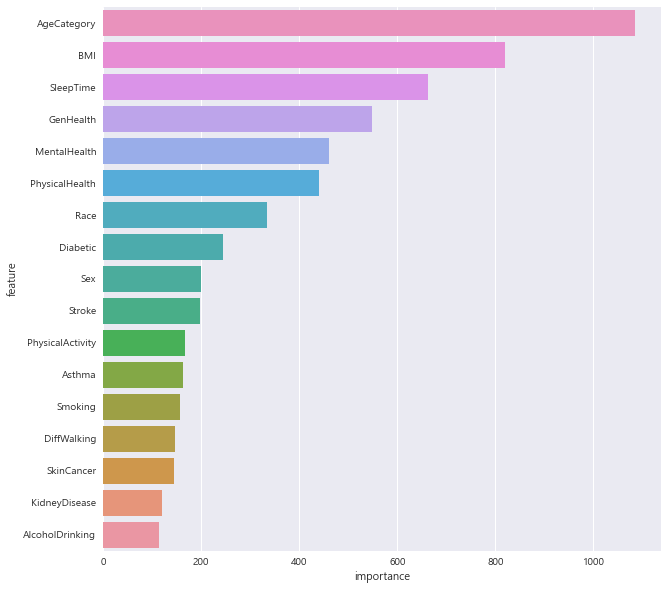

In [64]:
imp = pd.DataFrame({'feature': df.drop('HeartDisease', axis=1).columns, 'importance': clf.feature_importances_})
imp = imp.sort_values('importance').set_index('feature')

plt.figure(figsize=(10,10))
sns.barplot(y=imp.index, x=imp['importance'], orient='h').invert_yaxis()
# plt.savefig('importance.png')
plt.show()

## 한계점 및 피드백

- 오버샘플링과정에서 발생하는 재현율 감소를 해결하지 못했다.

=> 적절한 샘플링 수준을 찾으면 보완할 가능성이 존재한다.

- 추가적인 모델링과정이 필요해보인다.